# Welcome to BlazingSQL Notebooks!

BlazingSQL Notebooks is a fully managed, high-performance JupyterLab environment. 

**No setup required.** You just login and start writing code, immediately.

Every Notebooks environment has:   
- An attached CUDA GPU
- Pre-Installed GPU Data Science Packages ([BlazingSQL](https://github.com/BlazingDB/blazingsql), [RAPIDS](https://github.com/rapidsai), [Dask](https://github.com/dask), and many more)

Start running GPU-accelerated code below!

## The DataFrame
The RAPIDS ecosystem is built on the concept of a shared GPU DataFrame between all of the different libraries and packages.

There are two libraries specific to data manipulation:
- **BlazingSQL**:  SQL commands on a GPU DataFrame
- **cuDF**: Pandas-like commands on a GPU DataFrame.

### BlazingSQL (BSQL) 
[GitHub](https://github.com/BlazingDB/blazingsql) | [Intro Notebook](intro_notebooks/blazingcontext.ipynb)

Let's see how easy it is to SQL query a CSV file on a GPU.

In [1]:
from blazingsql import BlazingContext

# initialize BlazingContext to launch a BSQL session
bc = BlazingContext()

BlazingContext ready


In [2]:
import os
# create a BlazingSQL table from any file w/ .create_table(table_name, file_path)
bc.create_table('taxi', f'{os.getcwd()}/data/sample_taxi.csv', header=0)

In [3]:
# query a table with the .sql() method 
bc.sql('SELECT * FROM taxi')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_x,pickup_y,dropoff_x,dropoff_y
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,1,N,1,12.0,1.0,0.5,3.25,0.00,0.3,17.05,-8236962.878,66.693057,-8234835.381,66.694056
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,1,N,1,14.5,0.5,0.5,2.00,0.00,0.3,17.80,-8237825.768,66.642117,-8237020.631,66.710783
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,1,N,2,9.5,0.5,0.5,0.00,0.00,0.3,10.80,-8233561.431,66.796854,-8232278.987,66.839490
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,1,N,2,3.5,0.5,0.5,0.00,0.00,0.3,4.80,-8238653.836,66.621592,-8238123.872,66.633735
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,1,N,2,15.0,0.5,0.5,0.00,0.00,0.3,16.30,-8234433.662,66.717321,-8238107.735,66.678369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743655,1,2015-01-28 11:11:43,2015-01-28 11:29:03,1,2.60,1,N,1,12.5,0.0,0.5,1.50,0.00,0.3,14.80,-8233738.934,66.725941,-8236360.724,66.662901
743656,1,2015-01-28 11:11:43,2015-01-28 11:24:39,1,2.50,1,N,2,12.0,0.0,0.5,0.00,0.00,0.3,12.80,-8236326.753,66.619617,-8239263.633,66.604966
743657,1,2015-01-28 11:11:43,2015-01-28 11:19:05,1,0.50,1,N,1,6.0,0.0,0.5,1.70,0.00,0.3,8.50,-8237036.767,66.674845,-8236477.079,66.687925
743658,1,2015-01-28 11:11:43,2015-01-28 11:35:15,1,9.10,1,N,1,28.5,0.0,0.5,6.92,5.33,0.3,41.55,-8223703.602,66.740356,-8233243.793,66.732021


Learn more about [creating](intro_notebooks/create_tables.ipynb) and [querying](intro_notebooks/query_tables.ipynb) BlazingSQL tables, or the [BlazingContext API](intro_notebooks/blazingcontext.ipynb).

BlazingSQL returns each query's results as a cuDF DataFrame, making for easy handoff to GPU or non-GPU solutions.

In [4]:
type(bc.sql('select * from taxi'))

cudf.core.dataframe.DataFrame

### cuDF
[GitHub](https://github.com/rapidsai/cudf) | [Intro Notebook](intro_notebooks/bsql_cudf.ipynb)

cuDF is a GPU DataFrame Library similar to Pandas.

In [5]:
# keep results DataFrame as variable
gdf = bc.sql('select * from taxi where trip_distance < 10')

In [6]:
# utilize DataFrame methods like .head() or .tail()
gdf.tail(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_x,pickup_y,dropoff_x,dropoff_y
731204,1,2015-01-28 11:11:43,2015-01-28 11:35:15,1,9.1,1,N,1,28.5,0.0,0.5,6.92,5.33,0.3,41.55,-8223703.602,66.740356,-8233243.793,66.732021
731205,1,2015-01-28 11:11:44,2015-01-28 11:21:56,1,1.5,1,N,2,8.5,0.0,0.5,0.00,0.00,0.3,9.30,-8232741.006,66.735944,-8234567.002,66.711625


In [7]:
# tell me about the taxi rides under 10 miles
gdf.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_x,pickup_y,dropoff_x,dropoff_y
count,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,731206.000000,7.312060e+05,731206.000000,7.312060e+05,731206.000000
mean,1.525141,1.683695,2.110928,1.008933,1.388211,10.023943,0.315833,0.499003,1.300654,0.085120,0.283192,12.523875,-8.235333e+06,66.699610,-8.235131e+06,66.700190
std,0.499368,1.342609,1.735554,0.509256,0.497665,5.848819,0.366803,0.025225,1.621419,0.714763,0.068992,7.037828,2.397015e+03,0.043212,2.541876e+03,0.048194
min,1.000000,0.000000,0.000000,1.000000,1.000000,-52.000000,-1.000000,-0.500000,-81.000000,-5.330000,0.000000,-116.220000,-8.254080e+06,66.555036,-8.254078e+06,66.555036
25%,1.000000,1.000000,0.970000,1.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.000000,-8.236762e+06,66.670578,-8.236706e+06,66.669526
50%,2.000000,1.000000,1.570000,1.000000,1.000000,8.500000,0.000000,0.500000,1.000000,0.000000,0.300000,10.800000,-8.235663e+06,66.702066,-8.235514e+06,66.702750
75%,2.000000,2.000000,2.620000,1.000000,2.000000,12.000000,0.500000,0.500000,2.000000,0.000000,0.300000,14.800000,-8.234246e+06,66.728564,-8.233885e+06,66.730946
max,2.000000,9.000000,9.990000,99.000000,4.000000,900.000000,7.000000,0.500000,200.000000,117.820000,0.300000,900.300000,-8.210362e+06,66.870206,-8.210008e+06,66.870153


In [8]:
# or convert from cuDF .to_pandas() for access to pandas methods like .sample()
gdf.to_pandas().sample(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_x,pickup_y,dropoff_x,dropoff_y
267762,1,2015-01-13 18:59:42,2015-01-13 19:07:11,1,1.10,1,N,1,7.0,1.0,0.5,2.20,0.0,0.3,11.00,-8237290.708,66.668122,-8238241.924,66.689368
486689,2,2015-01-25 02:15:41,2015-01-25 02:29:16,1,4.74,1,N,1,15.0,0.5,0.5,3.37,0.0,0.3,19.67,-8237720.454,66.667926,-8234466.784,66.780575
400999,2,2015-01-26 11:46:22,2015-01-26 11:50:51,1,0.67,1,N,1,5.5,0.0,0.5,0.50,0.0,0.3,6.80,-8234414.128,66.780117,-8233969.095,66.768854


In [9]:
gdf.loc[(gdf['passenger_count'] > 1) & (gdf['trip_distance'] < 10)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_x,pickup_y,dropoff_x,dropoff_y
7,1,2015-01-10 20:33:39,2015-01-10 20:42:20,3,0.80,1,N,1,7.0,0.5,0.5,1.66,0.00,0.3,9.96,-8237938.725,66.661609,-8237086.877,66.646218
8,1,2015-01-10 20:33:40,2015-01-10 20:40:44,2,0.90,1,N,1,6.5,0.5,0.5,1.55,0.00,0.3,9.35,-8236037.990,66.728196,-8236074.511,66.711286
15,2,2015-01-15 19:05:40,2015-01-15 19:21:00,5,2.83,1,N,2,12.5,1.0,0.5,0.00,0.00,0.3,14.30,-8234158.488,66.701202,-8232646.734,66.765456
16,2,2015-01-15 19:05:40,2015-01-15 19:28:18,5,8.33,1,N,1,26.0,1.0,0.5,8.08,5.33,0.3,41.21,-8222398.228,66.731412,-8232378.355,66.763336
18,2,2015-01-15 19:05:41,2015-01-15 19:20:22,2,7.13,1,N,1,21.5,1.0,0.5,4.50,0.00,0.3,27.80,-8223667.082,66.740138,-8232340.986,66.630986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731180,2,2015-01-26 08:56:35,2015-01-26 09:10:50,5,1.21,1,N,1,10.0,0.0,0.5,2.00,0.00,0.3,12.80,-8235459.617,66.712511,-8234224.735,66.719906
731183,2,2015-01-15 22:26:52,2015-01-15 22:40:52,5,3.92,1,N,1,14.5,0.5,0.5,3.75,0.00,0.3,19.55,-8236620.611,66.642372,-8235840.952,66.564779
731186,1,2015-01-07 23:07:01,2015-01-07 23:13:12,4,1.00,1,N,1,6.0,0.5,0.5,1.45,0.00,0.3,8.75,-8238085.653,66.656741,-8236739.512,66.648231
731193,1,2015-01-28 11:11:40,2015-01-28 11:19:31,2,1.10,1,N,1,7.0,0.0,0.5,1.56,0.00,0.3,9.36,-8235440.083,66.683297,-8236826.141,66.664516


Learn more about [BlazingSQL + cuDF](intro_notebooks/bsql_cudf.ipynb).

## Data Visualization

Leverage your favorite Python visualization packages by converting a GPU DataFrame to a Pandas DataFrame with `.to_pandas()` or visualization packages that are GPU accelerated.

[Intro Notebook](intro_notebooks/data_visualization.ipynb)

### pandas

In [10]:
# matplotlib/seaborn on a .to_pandas() gdf
df = bc.sql('SELECT * FROM taxi').to_pandas()

corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_x,pickup_y,dropoff_x,dropoff_y
VendorID,1,0.299742,-0.00132903,-0.00977762,-0.0112657,0.00175996,0.00988121,0.00692277,-0.0117453,0.00217687,0.242798,-0.000436702,0.00796707,0.00762232,0.00216507,0.00615316
passenger_count,0.299742,1,-0.000553125,-0.00516744,0.0131011,0.00738508,0.00684952,0.00529868,-0.0111071,0.00391433,0.0458663,0.00436833,-0.00211478,-0.00232565,-0.00121632,-0.000283777
trip_distance,-0.00132903,-0.000553125,1,0.00102591,-0.000698798,0.0159808,-0.000333643,5.56622e-05,0.00871679,0.00981547,0.000102859,0.0159401,0.00517996,-0.000454872,0.00744814,0.00167076
RatecodeID,-0.00977762,-0.00516744,0.00102591,1,-0.000590712,0.062974,-0.0124544,-0.190843,0.0269015,0.045547,-0.00414398,0.060851,0.00446507,-0.00245536,-0.00789674,-0.00132013
payment_type,-0.0112657,0.0131011,-0.000698798,-0.000590712,1,-0.0961275,-0.0313527,-0.0458749,-0.595002,-0.0458035,-0.0463016,-0.212781,0.0344114,0.0653233,0.0439404,0.0649564
fare_amount,0.00175996,0.00738508,0.0159808,0.062974,-0.0961275,1,-0.00585413,-0.0816051,0.501594,0.480711,0.00168625,0.973958,0.234968,-0.0282738,0.280641,-0.0507077
extra,0.00988121,0.00684952,-0.000333643,-0.0124544,-0.0313527,-0.00585413,1,0.0406312,0.0334733,-0.0206284,0.0345444,0.0443768,-0.0319038,-0.0525884,0.021845,-0.0223311
mta_tax,0.00692277,0.00529868,5.56622e-05,-0.190843,-0.0458749,-0.0816051,0.0406312,1,-0.0300559,-0.0757462,0.00586908,-0.0754526,-0.00242349,0.00384593,0.0166294,0.00271048
tip_amount,-0.0117453,-0.0111071,0.00871679,0.0269015,-0.595002,0.501594,0.0334733,-0.0300559,1,0.353614,0.0264519,0.663295,0.139598,-0.0377305,0.122896,-0.0584887
tolls_amount,0.00217687,0.00391433,0.00981547,0.045547,-0.0458035,0.480711,-0.0206284,-0.0757462,0.353614,1,0.00263769,0.574899,0.363445,0.0679587,0.247424,0.0393681


### Matplotlib 

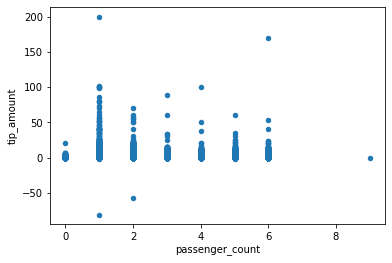

In [11]:
df.plot(kind='scatter', 
        x='passenger_count', 
        y='tip_amount')

### Datashader

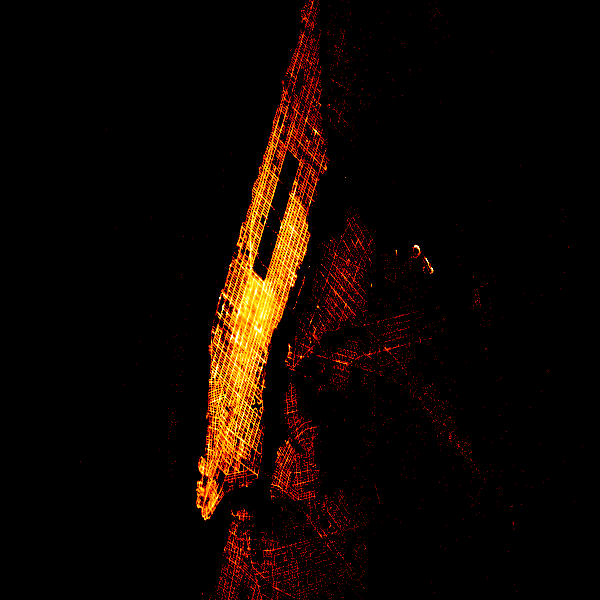

In [12]:
import datashader as ds
from colorcet import fire

# execute query & lay out a canvas w/ dropoff locations 
nyc = ds.Canvas().points(bc.sql('SELECT dropoff_x, dropoff_y FROM taxi'), 'dropoff_x', 'dropoff_y')

# shade in the picture w/ fire & display
ds.transfer_functions.set_background(ds.transfer_functions.shade(nyc, cmap=fire), "black")

## Machine Learning
### cuML 

cuML is a GPU-accelerated machine learning library similar to scikit-learn but made to run on the GPU DataFrame.

Let's predict fare amount of the `taxi` table we've been querying with a linear regression model.

In [13]:
%%time
from cuml import LinearRegression
from cuml.preprocessing.model_selection import train_test_split

# pull feature (X) and target (y) values
X = bc.sql('SELECT trip_distance, tolls_amount FROM taxi')
y = bc.sql('SELECT fare_amount FROM taxi')['fare_amount']

# split data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

CPU times: user 611 ms, sys: 321 ms, total: 932 ms
Wall time: 939 ms


In [14]:
%%time
# call Linear Regression model
lr = LinearRegression()

# train the model
lr.fit(X_train, y_train)

# make predictions for test X values
y_pred = lr.predict(X_test)

CPU times: user 342 ms, sys: 99.9 ms, total: 442 ms
Wall time: 457 ms


In [15]:
from sklearn.metrics import r2_score

# convert test & predicted values .to_pandas() & find the model's r2_score
r2_score(y_true=y_test.to_pandas(), y_pred=y_pred.to_pandas())

0.2420320848150701

## Graph Analytics

### cuGraph - RAPIDS Graph Analytics Library

Run graph analytics on GPU DataFrames with cuGraph, which aims to provide a NetworkX-like API on GPU DataFrames.

Pending resolution of [rapidsai/cugraph#744](https://github.com/rapidsai/cugraph/issues/744).

In [16]:
# import cugraph

# # assuming that data has been loaded into a cuDF (using read_csv) Dataframe
# bc.create_table('karate', f'{os.getcwd()}/data/karate.csv', names=["src", "dst"], delimiter='\t', dtype=["float", "float"])

# # create a Graph using the source (src) and destination (dst) vertex pairs the GDF  
# G = cugraph.Graph()
# G.add_edge_list(gdf, source='src', destination='dst')  # ERROR

# # Call cugraph.pagerank to get the pagerank scores
# gdf_page = cugraph.pagerank(G)

# for i in range(len(gdf_page)):
#     print("vertex " + str(gdf_page['vertex'][i]) + " PageRank is " + str(gdf_page['pagerank'][i]))  

### cuSignal - GPU-Accelerated Signal Processing

cuSignal is a direct port of Scipy Signal built to leverage GPU compute resources through cuPy and Numba.

<details><summary>...</summary>

The RAPIDS cuSignal project leverages CuPy, Numba, and the RAPIDS ecosystem for GPU accelerated signal processing. 
    
In some cases, cuSignal is a direct port of Scipy Signal to leverage GPU compute resources via CuPy but also contains Numba CUDA kernels for additional speedups for selected functions. 
    
cuSignal achieves its best gains on large signals and compute intensive functions but stresses online processing with zero-copy memory (pinned, mapped) between CPU and GPU.

[GitHub](https://github.com/rapidsai/cusignal) | [Intro Notebook](intro_notebooks/cusignal.ipynb)

</details>

In [1]:
import cusignal
import cupy as cp

start = 0
stop = 10
num_samps = int(1e8)
resample_up = 2
resample_down = 3

gx = cp.linspace(start, stop, num_samps, endpoint=False) 
gy = cp.cos(-gx**2/6.0)

gf = cusignal.resample_poly(gy, resample_up, resample_down, window=('kaiser', 0.5))

In [2]:
gf

array([ 0.84210917,  1.05803451,  0.98243487, ..., -0.56449014,
       -0.60792788, -0.48386073])

#### Storage Plugins - Scale Your Data

<details><summary>...</summary>
    
We think you should let data rest wherever it likes. Don't worry about synching, directly query files wherever they reside.

With the BlazingSQL Filesystem API, you can register and connect to multiple storage solutions. 

- [AWS](https://docs.blazingdb.com/docs/s3) 
- [Google Storage](https://docs.blazingdb.com/docs/google-cloud-storage)
- [HDFS](https://docs.blazingdb.com/docs/hdfs)

Once a filesystem is registered you can reference the user-defined file path when creating a new table off of a file.
    
[Docs](https://docs.blazingdb.com/docs/connecting-data-sources) | [Intro notebook](intro_notebooks/storage_plugins.ipynb)
    
</details>

In [18]:
# register AWS S3 storage bucket 
bc.s3('bsql_data', bucket_name='blazingsql-colab')

# tag S3 {s3://} file path to specific data directory within 'bsql_data'
tpch_sf10 = 's3://bsql_data/tpch_sf10/'

# create 'orders' table from list of 10 orders files
bc.create_table('orders', [f'{tpch_sf10}orders/0_0_{i}.parquet' for i in range(10)])

file s3://bsql_data/tpch_sf10/orders/0_0_0.parquet
file s3://bsql_data/tpch_sf10/orders/0_0_1.parquet
file s3://bsql_data/tpch_sf10/orders/0_0_2.parquet
file s3://bsql_data/tpch_sf10/orders/0_0_3.parquet
file s3://bsql_data/tpch_sf10/orders/0_0_4.parquet
file s3://bsql_data/tpch_sf10/orders/0_0_5.parquet
file s3://bsql_data/tpch_sf10/orders/0_0_6.parquet
file s3://bsql_data/tpch_sf10/orders/0_0_7.parquet
file s3://bsql_data/tpch_sf10/orders/0_0_8.parquet
file s3://bsql_data/tpch_sf10/orders/0_0_9.parquet


In [19]:
bc.sql('SELECT * FROM orders')

,o_orderkey,o_custkey,o_orderstatus,o_totalprice,o_orderdate,o_orderpriority,o_clerk,o_shippriority,o_comment
0,1,369001,O,186600.18,1996-01-02,5-LOW,Clerk#000009506,0,nstructions sleep furiously among
1,2,780017,O,66219.63,1996-12-01,1-URGENT,Clerk#000008792,0,"foxes. pending accounts at the pending, silen..."
2,3,1233140,F,270741.97,1993-10-14,5-LOW,Clerk#000009543,0,sly final accounts boost. carefully regular id...
3,4,1367761,O,41714.38,1995-10-11,5-LOW,Clerk#000001234,0,"sits. slyly regular warthogs cajole. regular, ..."
4,5,444848,F,122444.33,1994-07-30,5-LOW,Clerk#000009248,0,quickly. bold deposits sleep slyly. packages u...
...,...,...,...,...,...,...,...,...,...
14999995,59999972,633248,O,209183.10,1996-09-12,2-HIGH,Clerk#000005481,0,nusual requests alongside of the furiously spe...
14999996,59999973,483340,O,23707.55,1997-05-18,5-LOW,Clerk#000007026,0,ntly final requests haggle quickly according t...
14999997,59999974,970325,O,85705.68,1998-01-08,5-LOW,Clerk#000006095,0,ly ironic deposits. quickly regular accounts a...
14999998,59999975,241195,F,41163.97,1994-09-05,1-URGENT,Clerk#000007284,0,nic pinto beans. permanently regula


#### BlazingSQL Logs

<details><summary>...</summary>
    
BlazingSQL has an internal log that records events from every node from all queries run. The events include runtime query step execution information, performance timings, errors and warnings. 

The logs table is called `bsql_logs`. You can query the logs as if it were any other table, except you use the `.log()` function, instead of the `.sql()` function.
    
[Docs](https://docs.blazingdb.com/docs/blazingsql-logs) | [Intro Notebook](intro_notebooks/bsql_logs.ipynb)
    
</details>

In [20]:
# how long did each successfully run query take?
bc.log("SELECT log_time, query_id, duration FROM bsql_logs WHERE info = 'Query Execution Done' ORDER BY log_time DESC")

,log_time,query_id,duration
0,2020-03-20 18:31:02,15250,4087.504395
1,2020-03-20 18:30:13,17648,531.639648
2,2020-03-20 18:30:13,29236,283.871887
3,2020-03-20 18:30:08,28446,301.788025
4,2020-03-20 18:29:58,53592,379.216705
...,...,...,...
907,2020-03-10 21:33:04,60865,1235.057983
908,2020-03-10 21:32:44,26309,11.578487
909,2020-03-10 21:32:37,59691,12.673598
910,2020-03-10 21:30:47,46195,13.415771


#### Cyber Log Accelerators 

RAPIDS Cyber Log Accelerators (CLX)

<details><summary>...</summary>
    
CLX ("clicks") provides a collection of RAPIDS examples for security analysts, data scientists, and engineers to quickly get started applying RAPIDS and GPU acceleration to real-world cybersecurity use cases.

The goal of CLX is to:

- Allow cyber data scientists and SecOps teams to generate workflows, using cyber-specific GPU-accelerated primitives and methods, that let them interact with code using security language,
- Make available pre-built use cases that demonstrate CLX and RAPIDS functionality that are ready to use in a Security Operations Center (SOC),
- Accelerate log parsing in a flexible, non-regex method. and
- Provide SIEM integration with GPU compute environments via RAPIDS and effectively extend the SIEM environment.
    
[GitHub](https://github.com/rapidsai/clx) | [Intro Notebook](intro_notebooks/clx.ipynb)
    
</details>

In [1]:
import cudf
import s3fs
from os import path

# download data
if not path.exists("./splunk_faker_raw4"):
    fs = s3fs.S3FileSystem(anon=True)
    fs.get("rapidsai-data/cyber/clx/splunk_faker_raw4", "./splunk_faker_raw4")

# read in alert data
gdf = cudf.read_csv('./splunk_faker_raw4')
gdf.columns = ['raw']

# parse the alert data using CLX built-in parsers
from clx.parsers.splunk_notable_parser import SplunkNotableParser

snp = SplunkNotableParser()
parsed_gdf = cudf.DataFrame()
parsed_gdf = snp.parse(gdf, 'raw')

# define function to round time to the day
def round2day(epoch_time):
    return int(epoch_time/86400)*86400

# aggregate alerts by day
parsed_gdf['time'] = parsed_gdf['time'].astype(int)
parsed_gdf['day'] = parsed_gdf.time.applymap(round2day)
day_rule_gdf = parsed_gdf[['search_name','day','time']].groupby(['search_name', 'day']).count().reset_index()
day_rule_gdf.columns = ['rule', 'day', 'count']

# import the rolling z-score function from CLX statistics
from clx.analytics.stats import rzscore

# pivot the alert data so each rule is a column
def pivot_table(gdf, index_col, piv_col, v_col):
    index_list = gdf[index_col].unique()
    piv_gdf = cudf.DataFrame()
    piv_gdf[index_col] = index_list
    for group in gdf[piv_col].unique():
        
        temp_df = gdf[gdf[piv_col] == group]
        temp_df = temp_df[[index_col, v_col]]
        temp_df.columns = [index_col, group]
        piv_gdf = piv_gdf.merge(temp_df, on=[index_col], how='left')
        
    piv_gdf = piv_gdf.set_index(index_col)
    return piv_gdf.sort_index()

alerts_per_day_piv = pivot_table(day_rule_gdf, 'day', 'rule', 'count').fillna(0)

# create a new cuDF with the rolling z-score values calculated
r_zscores = cudf.DataFrame()
for rule in alerts_per_day_piv.columns:
    x = alerts_per_day_piv[rule]
    r_zscores[rule] = rzscore(x, 7) #7 day window

BlazingSQL is built on top of the RAPIDS AI ecosystem. RAPIDS is based on the Apache Arrow columnar memory format, and cuDF is a GPU DataFrame library for loading, joining, aggregating, filtering, and otherwise manipulating data.

BlazingSQL is a SQL interface for cuDF, with various features to support large scale data science workflows and enterprise datasets.

Query Data Stored Externally - a single line of code can register remote storage solutions, such as Amazon S3.
Simple SQL - incredibly easy to use, run a SQL query and the results are GPU DataFrames (GDFs).
Interoperable - GDFs are immediately accessible to any RAPIDS library for data science workloads.
    
BlazingContext is the Python API of BlazingSQL. 
    
Initializing BlazingContext connects allows you to create tables, run queries and utilize the power of GPU accelerated SQL.